## Assignment 5
Hannah McQuade
gk6387
IE 7860

Build decision trees and ensemble models for the Font Recognition dataset. Discussion and analysis of the results from the following models will be expected:

- Single Decision Tree (5 Points)
- Boosting Model (5 Points)
- Bagging Model (5 Points)
- Random Forest Model (5 Points)
- Feature importance using Random Forest model (5 Points)



In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import ensemble

#importing the data
train_records=pd.read_excel('data/Font_recogn.xlsx', sheetname='Decision_tree_train', index=False)
test_records=pd.read_excel('data/Font_recogn.xlsx', sheetname='Decision_tree_test', index=False)

train_records.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Output
0,12,9,2,2,0,0,0,0,0,1,1,1,0,0,C
1,25,9,0,0,0,11,0,5,0,0,0,0,0,0,E
2,15,10,0,0,0,4,0,5,0,0,0,0,0,0,F
3,14,10,1,2,0,0,0,0,9,0,1,1,1,0,G
4,8,22,0,0,0,4,6,4,6,0,0,0,0,0,H


In [2]:
#Splitting the data into input and output features

train_features = train_records.loc[:, train_records.columns!='Output']
train_output=train_records.loc[:, train_records.columns=='Output']

test_features = test_records.loc[:, test_records.columns!='Output']
test_output=test_records.loc[:, test_records.columns=='Output']

## Single Decision Tree

Creates classification rules based on which decision route explains the most variance and/or entropy of the data.

In [39]:
def Dec_tree(train_features, train_output, test_features, test_output, n):
    i=0
    runs=[]
    for i in range(0,n):
        sdt = tree.DecisionTreeClassifier()
        sdt=sdt.fit(train_features, train_output)
        sdt_predict=sdt.predict(test_features)
        sdt_accuracy = accuracy_score(test_output, sdt_predict)
        runs.append(sdt_accuracy)
        i+=1
    return runs

dec_runs = Dec_tree(train_features, train_output, test_features, test_output, 50)
dec_runs=pd.DataFrame(dec_runs)
dec_runs.columns=['Accuracy']
dec_runs.insert(loc=0, column='Model Name', value='Decision Tree')

## Boosting Model

Using decision trees as the "weak learner", the model makes a prediction, but then when another tree is added, gradient descent is used to mimimize the loss function and adjust weights.

In [35]:


def Boost_model(train_features, train_output, test_features, test_output, n):
    i=0
    runs=[]
    for i in range(0,n):
        boost=ensemble.GradientBoostingClassifier()
        boost=boost.fit(train_features, train_output)
        boost_predict = boost.predict(test_features)
        boost_accuracy = accuracy_score(test_output, boost_predict)
        runs.append(boost_accuracy)
        i+=1
    return runs

boost_runs=Boost_model(train_features, train_output, test_features, test_output, 50)

boost_runs=pd.DataFrame(boost_runs)
boost_runs.columns=['Accuracy']
boost_runs.insert(loc=0, column='Model Name', value='Boosting Model')

C:\Users\hanna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Bagging Model

Creates many smaller sub samples from the training dataset to train the model on, then it calculates the average predicition from each model.
Less concerned with individual trees overfitting the data

In [41]:
def Bag_model(train_features, train_output, test_features, test_output, n):
    i=0
    runs=[]
    for i in range(0,n):
        bag_model=ensemble.BaggingClassifier()
        bag_model=bag_model.fit(train_features, train_output)
        bag_predict = bag_model.predict(test_features)
        bag_accuracy = accuracy_score(test_output, bag_predict)
        runs.append(bag_accuracy)
        i+=1
    return runs

bag_runs=Bag_model(train_features, train_output, test_features, test_output, 50)

bag_runs=pd.DataFrame(bag_runs)
bag_runs.columns=['Accuracy']
bag_runs.insert(loc=0, column='Model Name', value='Bagging Model')

C:\Users\hanna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hanna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hanna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hanna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\hanna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hanna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hanna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hanna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

## Random Forest

Should be an improvement over bagging model
Random forest changes the way sub-trees are learned, resulting in less correlation between subtree predictions.

In [45]:
def rfc_model(train_features, train_output, test_features, test_output, n):
    i=0
    runs=[]
    for i in range(0,n):
        rfc=ensemble.RandomForestClassifier()
        rfc=rfc.fit(train_features, train_output)
        rfc_predict = rfc.predict(test_features)
        rfc_accuracy = accuracy_score(test_output, rfc_predict)
        runs.append(rfc_accuracy)
        i+=1
    return runs

rfc_runs=rfc_model(train_features, train_output, test_features, test_output, 50)

rfc_runs=pd.DataFrame(rfc_runs)
rfc_runs.columns=['Accuracy']
rfc_runs.insert(loc=0, column='Model Name', value='Random Forest')

C:\Users\hanna\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\hanna\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\hanna\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\hanna\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\hanna\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A col

,Accuracy
Model Name,
Bagging Model,0.734118
Boosting Model,0.595294
Decision Tree,0.691765
Random Forest,0.692941


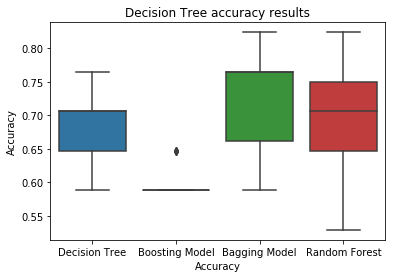

In [47]:
model_runs=dec_runs.append(boost_runs).append(bag_runs).append(rfc_runs)

sns.boxplot(x=model_runs['Model Name'], y=model_runs['Accuracy'])
plt.title('Decision Tree accuracy results')
plt.xlabel('Accuracy')
model_runs.groupby(['Model Name'], axis=0).mean()

From the 30 runs for each model method, we can see that the boosting model may have the better results overall. It has a wider range but if we remove the outlier then it has a higher max values than just 1 decision tree. Boosting model did not perform as well as any of the other methods. I wonder if I tried mixing the training data set up if that would change the results of the model comparison. 

It makes send that the bagging model and random forest have higher max accuracy values on average than the single decision tree. Each of the methods take many decision trees and aggregate them together, while changing around the decision criteria or how the models are trained. It is hard for just 1 decision tree to reach the same max accuracy score on its own.

If I had to choose a method to use, however, I would choose Random Forest. It runs many models to avoid overfitting the data, and the method of using only subset data to determine split points helps the prediction values from each tree created to be less correlated, resulting to get the most accurate results overall. According to the documentation, it should do better over the bagging model on average, even though that is not what my simulation here showed.

## Feature Importance using Random Forest

In [90]:
importances = rfc.feature_importances_
std=np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
for f in range(train_features.shape[1]):
    print("feature %d (%f)" % (1+indices[f], importances[indices[f]]))

feature 2 (0.185075)
feature 1 (0.130847)
feature 3 (0.115213)
feature 4 (0.113299)
feature 9 (0.102596)
feature 13 (0.065949)
feature 6 (0.056152)
feature 8 (0.053787)
feature 10 (0.047782)
feature 12 (0.041948)
feature 7 (0.024284)
feature 14 (0.023453)
feature 11 (0.021149)
feature 5 (0.018465)


Text(0,0.5,'Importance to classification')

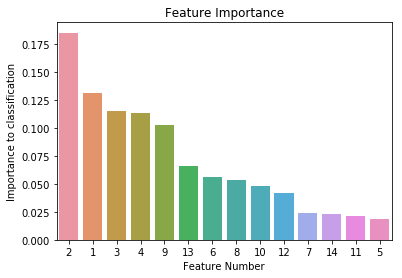

In [110]:
pairs=zip(indices+1, importances[indices])
pairs = sorted(pairs, key=lambda x: x[1], reverse=True)
sort_feature, sort_importance = zip(*pairs)
ax=sns.barplot(x=sort_feature, y=sort_importance, order=sort_feature)
plt.title('Feature Importance')
plt.xlabel('Feature Number')
plt.ylabel('Importance to classification')


With this training dataset, Feature 2 was the most important when determining the final letter classification. It was closely followed by 1, 3, 4, and 9. Next steps would be to mix up the training and test datasets before training the models to see if the results are similar. Then we could safely say if feature 2 is the most important or not.
